In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import datetime
from matplotlib.colors import LinearSegmentedColormap

if Path.home().name == "nikolaibeckjensen":
    DATA_ROOT = Path.home() / "Library" / "CloudStorage" / "OneDrive-DanmarksTekniskeUniversitet" / "Virk2Vec" / "data"
elif Path.home().name == "annabramslow":
    DATA_ROOT = Path.home() / "Library" / "CloudStorage" / "OneDrive-DanmarksTekniskeUniversitet(2)" / "Virk2Vec" / "data"

save_path = r'/Users/annabramslow/Desktop/Figurer - Deskriptiv Analyse'

In [13]:
plt.rcParams["grid.linestyle"] =  ":"
plt.rcParams["axes.edgecolor"] = "grey"
plt.rcParams["axes.linewidth"] = 0.7

#font 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

## Count Sentences

In [14]:
global_folder = DATA_ROOT / "processed" / "corpus" / "global_set" / "sentences" / "train"

In [15]:
#read all parquet files in global_folder
global_data = pd.concat([pd.read_parquet(file) for file in global_folder.glob("*.parquet")])

In [16]:
#remove columns CURRENT_ASSETS, CASH_AND_CASH_EQUIVALENTS, SHORT_TERM_LIABILITIES
global_data = global_data.drop(columns = ["CURRENT_ASSETS", "CASH_AND_CASH_EQUIVALENTS", "SHORT_TERM_LIABILITIES"])

In [17]:
#create list of all unique CVR numbers, which are the index values
CVR_list = global_data.index.values
CVR_list = list(dict.fromkeys(CVR_list))

In [18]:
#number of unique CVR numbers in the global training set
print("Number of unique CVR numbers in the global training set: ", len(CVR_list))

Number of unique CVR numbers in the global training set:  287631


In [19]:
#remove sentences after threshold (i.e. sentences in 2022 and 2023)
global_data= global_data[~global_data["AFTER_THRESHOLD"]]

In [9]:
global_data

,FROM_DATE,SENTENCE,FOUNDING_DATE,AFTER_THRESHOLD,AGE
CVR,,,,,
40975470,2521,ACT_OPEN IND_7732 MUN_370,2019-11-27,False,0.0
40975470,2521,CSTAT_ACTIVE,2019-11-27,False,0.0
40975470,2555,LEADER_DIRECTOR EXPERIENCE_3,2019-11-27,False,-1.0
40975470,2769,CTYPE_APS IND_7732 CSTAT_ACTIVE MUN_340 EMPLOY...,2019-11-27,False,0.0
40975470,2800,CTYPE_APS IND_7732 CSTAT_ACTIVE MUN_340 EMPLOY...,2019-11-27,False,0.0
...,...,...,...,...,...
33920717,3195,CTYPE_AS IND_1610 CSTAT_ACTIVE MUN_575 EMPLOYE...,1971-03-05,False,50.0
33920717,3220,CTYPE_AS IND_1610 CSTAT_ACTIVE MUN_575 PROFIT_...,1971-03-05,False,50.0
33920717,3226,CTYPE_AS IND_1610 CSTAT_ACTIVE MUN_575 EMPLOYE...,1971-03-05,False,50.0


### Production Units

In [79]:
#punit path
punit_folder = DATA_ROOT / "processed" / "sources" / "punits" / "tokenized"

In [80]:
#read all parquet files in punit_folder
punit_data = pd.concat([pd.read_parquet(file) for file in punit_folder.glob("*.parquet")])

In [81]:
#only keep the rows in punit_data that have a CVR number that is in CVR_list
punit_data = punit_data[punit_data.index.isin(CVR_list)]

#convert FROM_DATE to datetime
punit_data["FROM_DATE"] = pd.to_datetime(punit_data["FROM_DATE"])

#filter away rows with FROM_DATE after threshold
threshold = datetime.datetime(2022, 1, 1)
punit_data = punit_data[punit_data["FROM_DATE"] < threshold]


In [82]:
punit_data

,FROM_DATE,ACTION,MUNICIPALITY,INDUSTRY
CVR,,,,
40173048,2019-01-15,ACT_OPEN,MUN_169,IND_4333
40173064,2019-01-11,ACT_OPEN,MUN_479,IND_1812
40173099,2019-01-15,ACT_OPEN,MUN_201,IND_6202
40173129,2019-01-15,ACT_OPEN,MUN_791,IND_6420
40173137,2019-01-15,ACT_OPEN,MUN_269,IND_4339
...,...,...,...,...
37133574,2015-10-05,ACT_OPEN,MUN_265,IND_9999
37133698,2015-10-01,ACT_OPEN,MUN_230,IND_5829
37133728,2015-09-22,ACT_OPEN,MUN_430,IND_4531


In [83]:
#print number of sentences in the punit data 
print("Number of sentences in the status data: ", punit_data.shape[0])

Number of sentences in the status data:  244916


### Company Status

In [84]:
#status path
status_folder = DATA_ROOT / "processed" / "sources" / "status" / "tokenized"

In [85]:
#read all parquet files in status_folder
status_data = pd.concat([pd.read_parquet(file) for file in status_folder.glob("*.parquet")])

In [86]:
#only keep the rows in status_data that have a CVR number that is in CVR_list
status_data = status_data[status_data.index.isin(CVR_list)]

#convert FROM_DATE to datetime
status_data["FROM_DATE"] = pd.to_datetime(status_data["FROM_DATE"])

#filter away rows with FROM_DATE after threshold
threshold = datetime.datetime(2022, 1, 1)
status_data = status_data[status_data["FROM_DATE"] < threshold]

In [87]:
status_data

,FROM_DATE,COMPANY_STATUS
CVR,,
40287337,2019-02-25,CSTAT_ACTIVE
40287531,2019-02-25,CSTAT_ACTIVE
40287787,2019-02-25,CSTAT_ACTIVE
40287957,2019-02-24,CSTAT_ACTIVE
40287981,2019-02-25,CSTAT_ACTIVE
...,...,...
36049898,2017-09-18,CSTAT_DISSOLVED_DECLARATION
36049944,2014-07-11,CSTAT_ACTIVE
36049979,2014-07-15,CSTAT_ACTIVE


In [88]:
#print number of sentences in the status data (rows)
print("Number of sentences in the status data: ", status_data.shape[0])

Number of sentences in the status data:  267726


### Raising Capital

In [89]:
#capital path
capital_folder = DATA_ROOT / "processed" / "sources" / "capital" / "tokenized"

In [90]:
#read all parquet files in capital_folder
capital_data = pd.concat([pd.read_parquet(file) for file in capital_folder.glob("*.parquet")])

In [91]:
#only keep the rows in capital_data that have a CVR number that is in CVR_list
capital_data = capital_data[capital_data.index.isin(CVR_list)]

#convert FROM_DATE to datetime
capital_data["FROM_DATE"] = pd.to_datetime(capital_data["FROM_DATE"])

#filter away rows with FROM_DATE after threshold
threshold = datetime.datetime(2022, 1, 1)
capital_data = capital_data[capital_data["FROM_DATE"] < threshold]

In [92]:
capital_data

,FROM_DATE,PAYMENT_TYPE,RATE,INVESTMENT
CVR,,,,
39638754,2018-06-21,PAY_CASH,4.624167e+04,2.219600e+07
39638754,2018-06-21,PAY_CASH,2.270000e+04,2.315400e+07
39639157,2018-08-31,PAY_CASH,2.049072e+08,2.049072e+08
39639548,2021-10-15,PAY_CASH,1.000000e+02,4.000000e+04
39639785,2021-02-22,PAY_CASH,1.000000e+02,3.999900e+04
...,...,...,...,...
37167983,2021-10-12,PAY_CASH,1.000000e+02,4.000000e+04
37168025,2021-10-12,PAY_CASH,1.000000e+02,4.000000e+04
37169102,2021-07-15,PAY_MERGER,1.000000e+02,3.999900e+04


In [93]:
#print number of sentences in the capital data (rows)
print("Number of sentences in the capital data: ", capital_data.shape[0])

Number of sentences in the capital data:  57280


In [94]:
capital_data.PAYMENT_TYPE.value_counts()

PAY_CASH      33314
PAY_PROFIT    11561
PAY_DEBT       9052
PAY_ASSETS     1763
PAY_MERGER     1481
Name: PAYMENT_TYPE, dtype: int64

### Leadership

In [95]:
#leadership path
leadership_folder = DATA_ROOT / "processed" / "sources" / "leadership" / "tokenized"

In [96]:
#read all parquet files in leadership_folder
leadership_data = pd.concat([pd.read_parquet(file) for file in leadership_folder.glob("*.parquet")])

In [97]:
#only keep the rows in leadership_data that have a CVR number that is in CVR_list
leadership_data = leadership_data[leadership_data.index.isin(CVR_list)]

#convert FROM_DATE to datetime
leadership_data["FROM_DATE"] = pd.to_datetime(leadership_data["FROM_DATE"])

#filter away rows with FROM_DATE after threshold
threshold = datetime.datetime(2022, 1, 1)
leadership_data = leadership_data[leadership_data["FROM_DATE"] < threshold]

In [98]:
leadership_data

,FROM_DATE,PARTICIPANT_TYPE,EXPERIENCE
CVR,,,
30723910,2013-12-31,LEADER_DIRECTOR,6
30723910,2014-12-31,LEADER_DIRECTOR,7
30723910,2015-12-31,LEADER_DIRECTOR,8
30723910,2016-12-31,LEADER_DIRECTOR,9
30723910,2017-12-31,LEADER_DIRECTOR,10
...,...,...,...
41024135,2019-12-31,LEADER_CEO,0
41024135,2020-12-31,LEADER_CEO,1
41024135,2021-12-31,LEADER_CEO,2


In [99]:
#compute number of unique combinations of CVR number and FROM_DATE in the leadership data
print("Number of unique combinations of CVR number and FROM_DATE in the leadership data: ", leadership_data.groupby(["CVR", "FROM_DATE"]).size().shape[0])

Number of unique combinations of CVR number and FROM_DATE in the leadership data:  1724931


### Ownership

In [100]:
#ownership path
ownership_folder = DATA_ROOT / "processed" / "sources" / "ownership" / "tokenized"

In [101]:
#read all parquet files in ownership_folder
ownership_data = pd.concat([pd.read_parquet(file) for file in ownership_folder.glob("*.parquet")])

In [102]:
#only keep the rows in ownership_data that have a CVR number that is in CVR_list
ownership_data = ownership_data[ownership_data.index.isin(CVR_list)]

#convert FROM_DATE to datetime
ownership_data["FROM_DATE"] = pd.to_datetime(ownership_data["FROM_DATE"])

#filter away rows with FROM_DATE after threshold
threshold = datetime.datetime(2022, 1, 1)
ownership_data = ownership_data[ownership_data["FROM_DATE"] < threshold]

In [103]:
ownership_data

,FROM_DATE,OWNER_TYPE,SHARE,INDUSTRY,EMPLOYEE_COUNT,ASSETS
CVR,,,,,,
10000157,2018-11-28,OTYP_EXT,SHARE_50_60,IND_9312,10.0,2584696.0
10000157,2019-10-24,OTYP_EXT,SHARE_50_60,IND_2599,10.0,12162243.0
10000157,2020-10-29,OTYP_EXT,SHARE_90_100,IND_8690,NaN,8478372.0
10000157,2021-06-09,OTYP_EXT,SHARE_20_30,IND_6499,NaN,4468213.0
10000157,2021-08-10,OTYP_EXT,SHARE_90_100,IND_4643,30.0,192736000.0
...,...,...,...,...,...,...
89990114,2021-04-01,OTYP_INT,SHARE_20_30,IND_6430,1.0,9119497.0
89998719,2015-09-23,OTYP_EXT,SHARE_90_100,IND_5110,4.0,10761539.0
89998719,2020-11-30,OTYP_INT,SHARE_90_100,IND_6420,NaN,13722000.0


In [104]:
#compute number of sentences in the ownership data
print("Number of sentences in the ownership data: ", ownership_data.shape[0])

Number of sentences in the ownership data:  403202


### Annual Reports

In [105]:
#financials path
financials_folder = DATA_ROOT / "processed" / "sources" / "financials" / "tokenized"

In [106]:
#read all parquet files in financials_folder
financials_data = pd.concat([pd.read_parquet(file) for file in financials_folder.glob("*.parquet")])

In [107]:
#only keep the rows in financials_data that have a CVR number that is in CVR_list
financials_data = financials_data[financials_data.index.isin(CVR_list)]

#convert FROM_DATE to datetime
financials_data["FROM_DATE"] = pd.to_datetime(financials_data["FROM_DATE"])

#filter away rows with FROM_DATE after threshold
threshold = datetime.datetime(2022, 1, 1)
financials_data = financials_data[financials_data["FROM_DATE"] < threshold]

In [108]:
financials_data

,FROM_DATE,COMPANY_TYPE,INDUSTRY,COMPANY_STATUS,MUNICIPALITY,PROFIT_LOSS,EQUITY,ASSETS,LIABILITIES,SHORT_TERM_LIABILITIES,CASH_AND_CASH_EQUIVALENTS,CURRENT_ASSETS
CVR,,,,,,,,,,,,
37427713,2017-05-30,CTYPE_APS,IND_9999,CSTAT_ACTIVE,MUN_740,-670.0,49330.0,49330.0,NaN,NaN,9330.0,9330.0
37427713,2018-05-16,CTYPE_APS,IND_9999,CSTAT_ACTIVE,MUN_740,-28361.0,20969.0,20969.0,NaN,NaN,9093.0,9093.0
37427713,2019-05-09,CTYPE_APS,IND_9999,CSTAT_ACTIVE,MUN_740,-744.0,20225.0,20225.0,NaN,NaN,8807.0,8807.0
37427713,2020-05-17,CTYPE_APS,IND_7022,CSTAT_ACTIVE,MUN_740,34654.0,54879.0,58850.0,3971.0,3971.0,51649.0,51649.0
37427713,2021-05-28,CTYPE_APS,IND_7022,CSTAT_ACTIVE,MUN_740,-25168.0,53908.0,62611.0,8703.0,8703.0,62611.0,62611.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32357075,2017-06-01,CTYPE_APS,IND_6499,CSTAT_ACTIVE,MUN_101,133919.0,291478.0,2390439.0,2098961.0,2098961.0,118183.0,1633596.0
32357075,2018-05-31,CTYPE_APS,IND_6499,CSTAT_ACTIVE,MUN_101,461197.0,592675.0,1973365.0,1380690.0,1380690.0,172791.0,1236348.0
32357075,2019-06-03,CTYPE_APS,IND_6499,CSTAT_ACTIVE,MUN_101,-374645.0,-241970.0,2265315.0,2507285.0,2507285.0,99108.0,1608212.0


In [109]:
#compute number of sentences in the financials data
print("Number of sentences in the financials data: ", financials_data.shape[0])

Number of sentences in the financials data:  1573149


### Employees

In [110]:
#employees path
employees_folder = DATA_ROOT / "processed" / "sources" / "employees" / "tokenized"

In [111]:
#read all parquet files in employees_folder
employees_data = pd.concat([pd.read_parquet(file) for file in employees_folder.glob("*.parquet")])

In [112]:
#only keep the rows in employees_data that have a CVR number that is in CVR_list
employees_data = employees_data[employees_data.index.isin(CVR_list)]

#convert FROM_DATE to datetime
employees_data["FROM_DATE"] = pd.to_datetime(employees_data["FROM_DATE"])

#filter away rows with FROM_DATE after threshold
threshold = datetime.datetime(2022, 1, 1)
employees_data = employees_data[employees_data["FROM_DATE"] < threshold]

In [113]:
employees_data

,FROM_DATE,COMPANY_TYPE,INDUSTRY,COMPANY_STATUS,MUNICIPALITY,EMPLOYEE_COUNT
CVR,,,,,,
38147323,2018-01-01,CTYPE_IVS,IND_6201,CSTAT_ACTIVE,MUN_461,1
38147323,2018-04-01,CTYPE_IVS,IND_7311,CSTAT_ACTIVE,MUN_461,1
38147323,2018-06-01,CTYPE_IVS,IND_7311,CSTAT_ACTIVE,MUN_461,1
38147323,2018-07-01,CTYPE_IVS,IND_7311,CSTAT_ACTIVE,MUN_461,1
38147323,2018-08-01,CTYPE_IVS,IND_7311,CSTAT_ACTIVE,MUN_461,1
...,...,...,...,...,...,...
32298338,2021-08-01,CTYPE_APS,IND_7120,CSTAT_ACTIVE,MUN_707,1
32298338,2021-09-01,CTYPE_APS,IND_7120,CSTAT_ACTIVE,MUN_707,1
32298338,2021-10-01,CTYPE_APS,IND_7120,CSTAT_ACTIVE,MUN_707,1


In [114]:
#compute number of sentences in the employees data
print("Number of sentences in the employees data: ", employees_data.shape[0])

Number of sentences in the employees data:  5923637


## Count tokens

#### Industry

In [126]:
#combine lists of INDUSTRY column from employees, financials, ownership, and punit data to find industry tokens
industry_tokens = employees_data["INDUSTRY"].tolist() + financials_data["INDUSTRY"].tolist() + ownership_data["INDUSTRY"].tolist() + punit_data["INDUSTRY"].tolist()

#find unique industry tokens
industry_tokens = list(dict.fromkeys(industry_tokens))

In [143]:
industry_tokens

['IND_6201',
 'IND_7311',
 'IND_8623',
 'IND_3250',
 'IND_8299',
 'IND_3315',
 'IND_7112',
 'IND_8720',
 'IND_7810',
 'IND_9609',
 'IND_3109',
 'IND_6202',
 'IND_4391',
 'IND_5320',
 'IND_4779',
 'IND_4332',
 'IND_5814',
 'IND_4771',
 'IND_0149',
 'IND_4729',
 'IND_4642',
 'IND_8220',
 'IND_5210',
 'IND_6831',
 'IND_4333',
 'IND_7219',
 'IND_7490',
 'IND_5911',
 'IND_4334',
 'IND_4941',
 'IND_4743',
 'IND_5510',
 'IND_4741',
 'IND_2899',
 'IND_0111',
 'IND_5610',
 'IND_4611',
 'IND_4648',
 'IND_7410',
 'IND_7111',
 'IND_2740',
 'IND_4791',
 'IND_7021',
 'IND_7022',
 'IND_7820',
 'IND_8121',
 'IND_8129',
 'IND_6499',
 'IND_4711',
 'IND_4671',
 'IND_5630',
 'IND_7420',
 'IND_9319',
 'IND_4742',
 'IND_6420',
 'IND_7430',
 'IND_7732',
 'IND_8122',
 'IND_7729',
 'IND_4520',
 'IND_7990',
 'IND_6311',
 'IND_9001',
 'IND_1032',
 'IND_9601',
 'IND_4322',
 'IND_4638',
 'IND_4531',
 'IND_2829',
 'IND_2410',
 'IND_9602',
 'IND_9313',
 'IND_4939',
 'IND_4615',
 'IND_4399',
 'IND_4942',
 'IND_6920',

In [127]:
len(industry_tokens)

933

#### Status

In [134]:
#combine lists of STATUS column from employees, financials and status data to find status tokens
status_tokens = employees_data["COMPANY_STATUS"].tolist() + financials_data["COMPANY_STATUS"].tolist() + status_data["COMPANY_STATUS"].tolist()

#find unique status tokens
status_tokens = list(dict.fromkeys(status_tokens))

In [136]:
status_tokens

['CSTAT_ACTIVE',
 'CSTAT_ONGOING_DISSOLUTION',
 'CSTAT_DISSOLVED_MERGER',
 'CSTAT_ONGOING_BANKRUPTCY',
 'CSTAT_ONGOING_LIQUIDATION',
 'CSTAT_NO_LEGAL_EFFECT',
 'CSTAT_DISSOLVED',
 'CSTAT_ONGOING_RECONSTRUCTION',
 'CSTAT_DISSOLVED_DECLARATION',
 'CSTAT_DISSOLVED_LIQUIDATION',
 '[UNK]',
 'CSTAT_ONGOING_REASSUMPTION',
 'CSTAT_DISSOLVED_MIGRATION']

In [142]:
len(status_tokens)-1

12

#### Municipality

In [137]:
#combine lists of MUNICIPALITY column from employees, financials and punit data to find municipality tokens
municipality_tokens = employees_data["MUNICIPALITY"].tolist() + financials_data["MUNICIPALITY"].tolist() + punit_data["MUNICIPALITY"].tolist()

#find unique municipality tokens
municipality_tokens = list(dict.fromkeys(municipality_tokens))

In [140]:
municipality_tokens

['MUN_461',
 'MUN_175',
 'MUN_101',
 'MUN_740',
 'MUN_760',
 'MUN_561',
 'MUN_259',
 'MUN_350',
 'MUN_173',
 'MUN_773',
 'MUN_756',
 'MUN_250',
 'MUN_219',
 'MUN_540',
 'MUN_167',
 'MUN_657',
 'MUN_621',
 'MUN_851',
 'MUN_810',
 'MUN_201',
 'MUN_157',
 'MUN_217',
 'MUN_159',
 'MUN_751',
 'MUN_730',
 'MUN_727',
 'MUN_813',
 'MUN_153',
 'MUN_165',
 'MUN_163',
 'MUN_791',
 'MUN_376',
 'MUN_766',
 'MUN_846',
 'MUN_615',
 'MUN_147',
 'MUN_169',
 'MUN_410',
 'MUN_330',
 'MUN_630',
 'MUN_746',
 'MUN_270',
 'MUN_450',
 'MUN_230',
 'MUN_210',
 'MUN_661',
 'MUN_151',
 'MUN_707',
 'MUN_240',
 'MUN_820',
 'MUN_607',
 'MUN_336',
 'MUN_316',
 'MUN_340',
 'MUN_573',
 'MUN_320',
 'MUN_265',
 'MUN_482',
 'MUN_420',
 'MUN_253',
 'MUN_510',
 'MUN_779',
 'MUN_492',
 'MUN_710',
 'MUN_706',
 'MUN_190',
 'MUN_183',
 'MUN_479',
 'MUN_860',
 'MUN_430',
 'MUN_370',
 'MUN_161',
 'MUN_400',
 'MUN_269',
 'MUN_840',
 'MUN_665',
 'MUN_187',
 'MUN_223',
 'MUN_260',
 'MUN_390',
 'MUN_787',
 'MUN_849',
 'MUN_306',
 'MU

In [141]:
len(municipality_tokens)-1

329

## Global set sequence length analysis

In [115]:
global_data['LENGTH'] = global_data["SENTENCE"].apply(lambda x: len(x.split()))

In [116]:
global_data

,FROM_DATE,SENTENCE,FOUNDING_DATE,AFTER_THRESHOLD,AGE,LENGTH
CVR,,,,,,
40975470,2521,ACT_OPEN IND_7732 MUN_370,2019-11-27,False,0.0,3
40975470,2521,CSTAT_ACTIVE,2019-11-27,False,0.0,1
40975470,2555,LEADER_DIRECTOR EXPERIENCE_3,2019-11-27,False,-1.0,2
40975470,2769,CTYPE_APS IND_7732 CSTAT_ACTIVE MUN_340 EMPLOY...,2019-11-27,False,0.0,5
40975470,2800,CTYPE_APS IND_7732 CSTAT_ACTIVE MUN_340 EMPLOY...,2019-11-27,False,0.0,5
...,...,...,...,...,...,...
33920717,3195,CTYPE_AS IND_1610 CSTAT_ACTIVE MUN_575 EMPLOYE...,1971-03-05,False,50.0,5
33920717,3220,CTYPE_AS IND_1610 CSTAT_ACTIVE MUN_575 PROFIT_...,1971-03-05,False,50.0,11
33920717,3226,CTYPE_AS IND_1610 CSTAT_ACTIVE MUN_575 EMPLOYE...,1971-03-05,False,50.0,5


In [117]:
seqlen = global_data.groupby("CVR")["LENGTH"].sum()

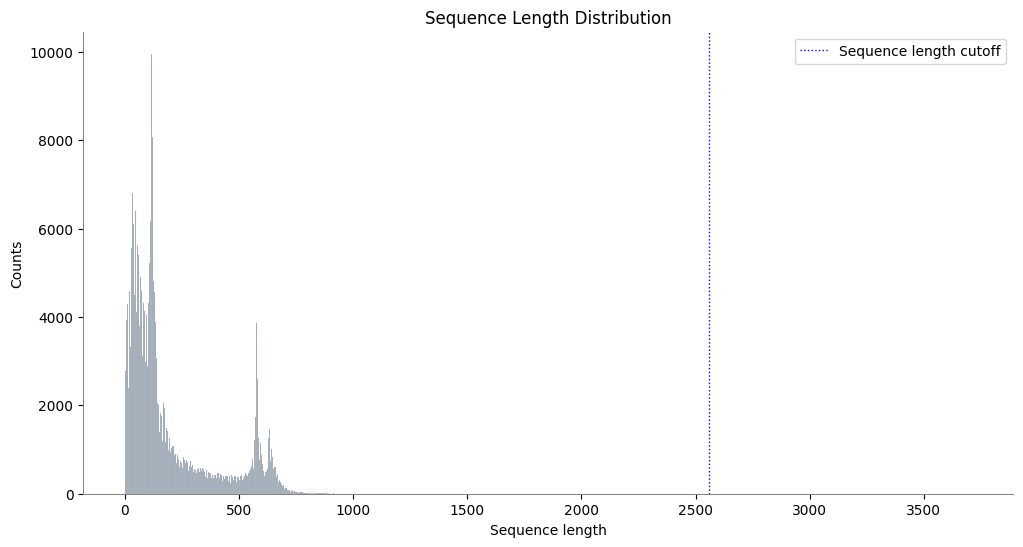

In [118]:
#plot histogram of sentence lengths
plt.figure(figsize=(12, 6))
sns.histplot(seqlen, bins=1000, color="lightslategray", edgecolor='white')
plt.title("Sequence Length Distribution")
plt.xlabel("Sequence length")
plt.ylabel("Counts")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add vertical line at 2560
ax.axvline(2560, color="blue", linewidth=1, linestyle=":", label="Sequence length cutoff")
plt.legend()

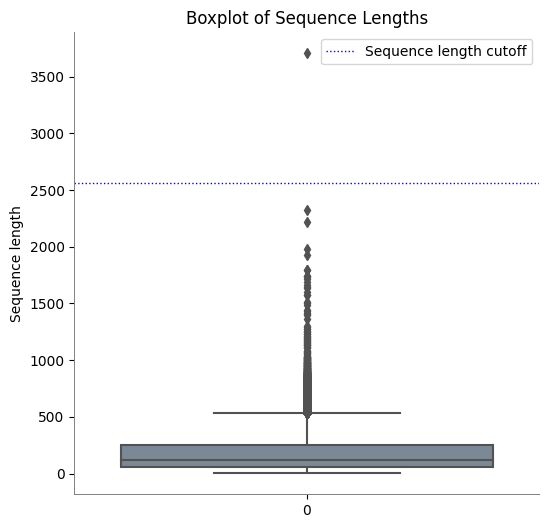

In [119]:
#plot boxplot of sequence lengths
plt.figure(figsize=(6, 6))
sns.boxplot(seqlen.values, color="lightslategray")
plt.title("Boxplot of Sequence Lengths")
plt.ylabel("Sequence length")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Add vertical line at 2560
ax.axhline(2560, color="blue", linewidth=1, linestyle=":", label="Sequence length cutoff")
plt.legend()


## Vocab size

In [4]:
# load final tokens
final_tokens = pd.read_csv(DATA_ROOT / "processed" / "vocab" / "global_set" / "result.tsv", sep="\t")

In [5]:
final_tokens

,ID,TOKEN,CATEGORY
0,0,[PAD],GENERAL
1,1,[CLS],GENERAL
2,2,[SEP],GENERAL
3,3,[MASK],GENERAL
4,4,[PLCH0],GENERAL
...,...,...,...
988,988,SHORT_TERM_LIABILITIES_94,SHORT
989,989,SHORT_TERM_LIABILITIES_95,SHORT
990,990,SHORT_TERM_LIABILITIES_96,SHORT
991,991,SHORT_TERM_LIABILITIES_97,SHORT


In [7]:
print("Number of unique tokens in the global training set: ", final_tokens.shape[0])

Number of unique tokens in the global training set:  993


In [6]:
final_tokens.CATEGORY.value_counts()

IND            118
EQUITY          98
CURRENT         97
LIABILITIES     97
SHORT           97
ASSETS          97
PROFIT          96
CASH            95
MUN             93
EMPLOYEES       35
EXPERIENCE      14
GENERAL         10
CSTAT            9
INV              8
SHARE            7
RATE             6
PAY              5
LEADER           4
CTYPE            3
ACT              2
OTYP             2
Name: CATEGORY, dtype: int64

In [9]:
#find the cstat tokens
final_tokens[final_tokens["CATEGORY"] == "CSTAT"]["TOKEN"]

204                   CSTAT_ACTIVE
205                CSTAT_DISSOLVED
206    CSTAT_DISSOLVED_DECLARATION
207    CSTAT_DISSOLVED_LIQUIDATION
208         CSTAT_DISSOLVED_MERGER
209          CSTAT_NO_LEGAL_EFFECT
210       CSTAT_ONGOING_BANKRUPTCY
211      CSTAT_ONGOING_DISSOLUTION
212      CSTAT_ONGOING_LIQUIDATION
Name: TOKEN, dtype: object